# Módulo 3: Búsqueda de controles geológicos

# Librerías

In [10]:
import pandas as pd 
import plotly.express as px
import probscale
import matplotlib.pyplot as plt

# Carga de archivos

In [11]:
DH = pd.read_csv('db_mineralogia.csv', sep=',')
DH

,East,North,Elevation,bo,cpy,py,alte,mine,dom
0,156911.7393,93193.44188,3827.13,0.000,0.564,1.199,BTK,CPY,3
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3
...,...,...,...,...,...,...,...,...,...
1270,156988.2447,92051.49218,2849.81,0.039,0.947,0.063,BTK,CPY,3
1271,157005.5199,92071.95481,2753.56,0.001,1.000,0.272,BTK,CPY,3
1272,156214.7871,91746.89044,3249.31,0.019,0.740,7.601,SCL,CPY,3
1273,156214.4738,91738.09338,3047.85,0.001,1.139,7.086,ANH,CPY,3


# Estadística Global

In [12]:
DH.describe().T

,count,mean,std,min,25%,50%,75%,max
East,1275.0,156842.761676,653.918638,155448.72330,156390.57900,156764.98550,157241.01415,158454.74320
North,1275.0,92566.381963,424.794056,91561.04008,92203.21228,92553.96893,92879.35623,93569.02053
Elevation,1275.0,3340.410173,250.859647,2703.21000,3190.55000,3359.16000,3538.83500,3827.69000
bo,1275.0,0.140922,0.190800,0.00000,0.00150,0.05800,0.21500,1.66100
cpy,1275.0,1.073958,0.561443,0.00000,0.71550,0.99000,1.27850,6.84900
py,1275.0,1.344159,1.987731,0.00000,0.17800,0.60600,1.61850,16.52000
dom,1275.0,2.814118,0.397150,1.00000,3.00000,3.00000,3.00000,3.00000


# Estadísticas por categoría: Alteración

In [13]:
stats_by_alte = DH.groupby(['alte']).describe()
stats_by_alte['bo']

,count,mean,std,min,25%,50%,75%,max
alte,,,,,,,,
ANH,3.0,0.001333,0.001528,0.000,0.00050,0.0010,0.00200,0.003
BTK,761.0,0.205601,0.212441,0.000,0.02400,0.1400,0.32600,1.661
FIL,37.0,0.018919,0.061444,0.000,0.00000,0.0010,0.00600,0.363
HOR,8.0,0.004500,0.006887,0.000,0.00000,0.0000,0.00775,0.017
POT,88.0,0.126318,0.135657,0.000,0.02300,0.0970,0.16875,0.763
PPL,2.0,0.099500,0.127986,0.009,0.05425,0.0995,0.14475,0.190
SCL,370.0,0.029862,0.067901,0.000,0.00000,0.0020,0.01775,0.570
SKR,6.0,0.018167,0.037494,0.000,0.00000,0.0010,0.01025,0.094


# Distribución acumulada por categoría (Probplot): Alteración

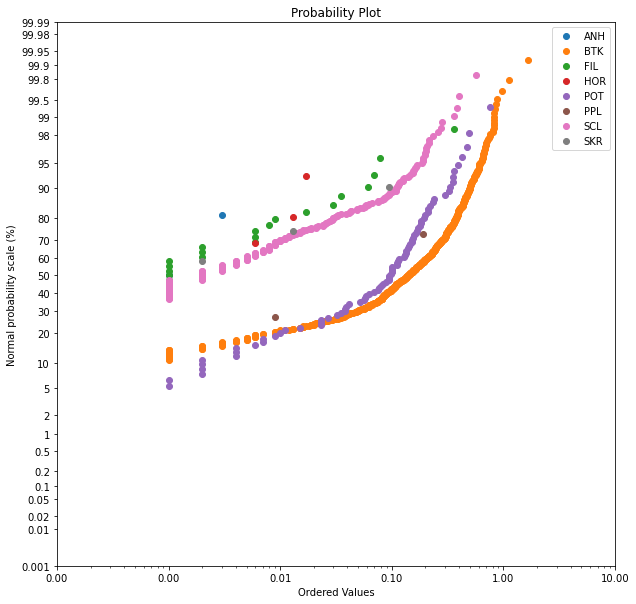

In [14]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in DH.groupby('alte').groups.keys():
    xData = DH.groupby('alte').get_group(category)['bo'].sort_values()
    probscale.probplot(xData, ax=ax, probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom=0.001,top=99.99)
ax.set_xlim(left=1e-4, right=1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probplot_alte.png')

# Visualización por categoría: Alteración

In [16]:
DH_filtered = DH[(DH['alte'] == 'BTK') | (DH['alte'] == 'POT')]
fig = px.scatter_3d(DH_filtered, x='East', y='North', z='Elevation', color='bo', color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH['bo'].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

DH_filtered = DH[(DH['alte'] == 'SCL')]
fig = px.scatter_3d(DH_filtered, x='East', y='North', z='Elevation', color='bo', color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH['bo'].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

# Estadísticas por categoría: Zona Mineral

In [78]:
stats_by_mine = DH.groupby(['mine']).describe()
stats_by_mine['bo']

,count,mean,std,min,25%,50%,75%,max
mine,,,,,,,,
BN,351.0,0.328171,0.212428,0.0,0.17550,0.307,0.44400,1.661
CPY,913.0,0.070581,0.121916,0.0,0.00000,0.010,0.09800,0.880
OX,3.0,0.000333,0.000577,0.0,0.00000,0.000,0.00050,0.001
PPY,8.0,0.005750,0.007517,0.0,0.00075,0.003,0.00725,0.022


# Distribución acumulada por categoría (Probplot): Zona Mineral

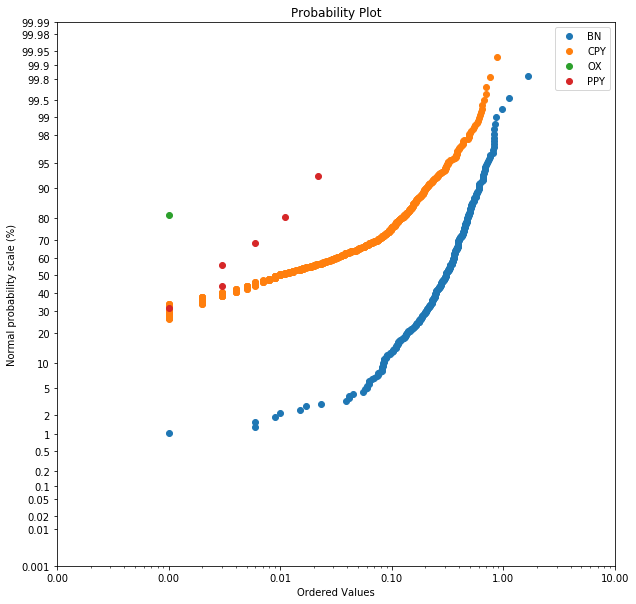

In [79]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in DH.groupby('mine').groups.keys():
    xData = DH.groupby('mine').get_group(category)['bo'].sort_values()
    probscale.probplot(xData, ax=ax, probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom=0.001,top=99.99)
ax.set_xlim(left=1e-4, right=1e1)
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.savefig('probplot_mine.png')

# Visualización por categoría: Zona Mineral

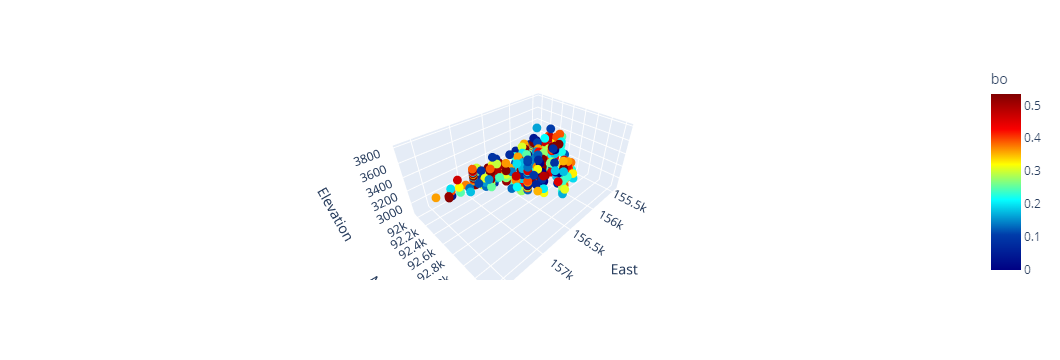

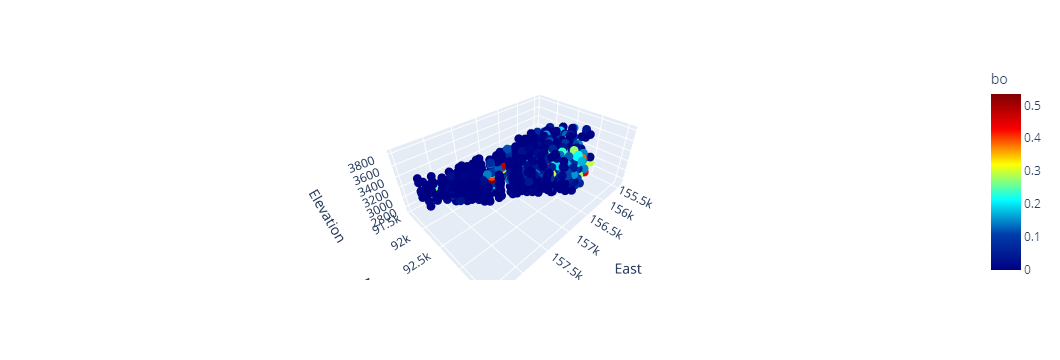

In [81]:
DH_filtered = DH[DH['mine'] == 'BN']
fig = px.scatter_3d(DH_filtered, x='East', y='North', z='Elevation', color='bo',  color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH['bo'].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

DH_filtered = DH[DH['mine'] == 'CPY']
fig = px.scatter_3d(DH_filtered, x='East', y='North', z='Elevation', color='bo', color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH['bo'].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

# Estadísticas por categoría: Dominio

In [82]:
stats_by_dom = DH.groupby(['dom']).describe()
stats_by_dom['bo']

,count,mean,std,min,25%,50%,75%,max
dom,,,,,,,,
1,4.0,0.003500,0.003416,0.0,0.0015,0.0030,0.00500,0.008
2,229.0,0.018603,0.051219,0.0,0.0000,0.0010,0.00800,0.360
3,1042.0,0.168331,0.199656,0.0,0.0060,0.0955,0.26675,1.661


# Distribución acumulada por categoría (Probplot): Dominio

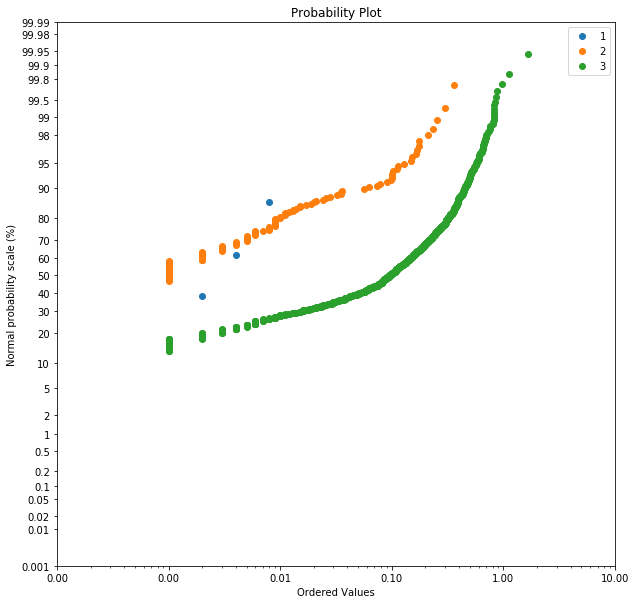

In [83]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in DH.groupby('dom').groups.keys():
    xData = DH.groupby('dom').get_group(category)['bo'].sort_values()
    probscale.probplot(xData, ax=ax, probax='y', datascale='log',label=category)
ax.legend()
ax.set_ylim(bottom=0.001,top=99.99)
ax.set_xlim(left=1e-4, right=1e1)
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.savefig('probplot_dom.png')

# Visualización por categoría: Dominio

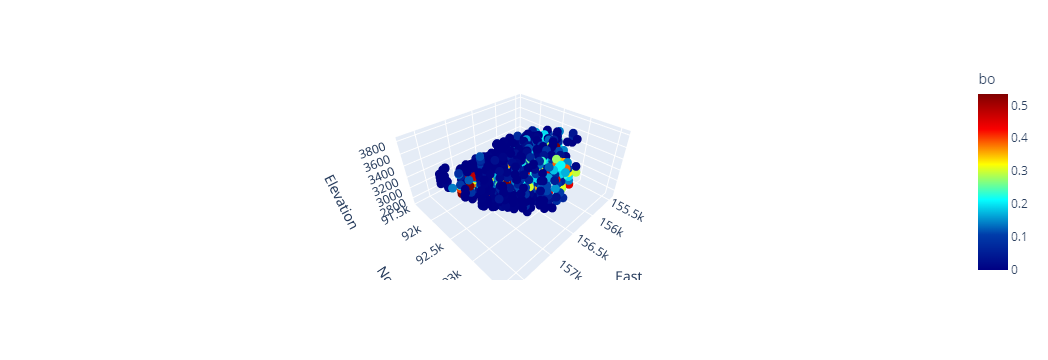

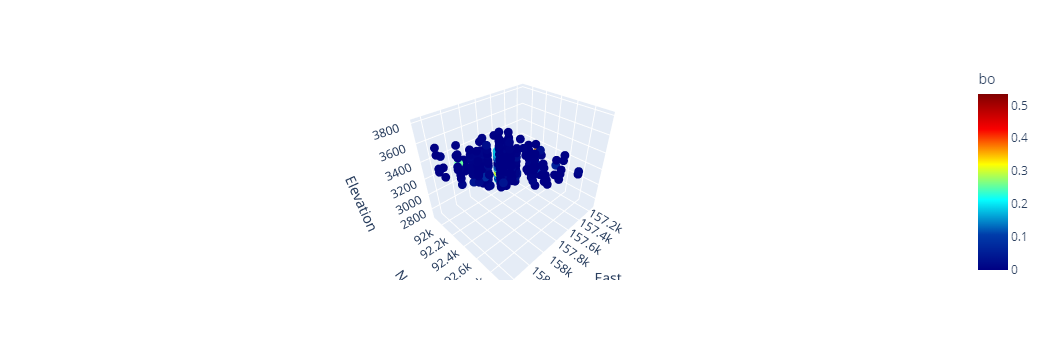

In [84]:
DH_filtered = DH[DH['dom'] == 3]
fig = px.scatter_3d(DH_filtered,x='East', y='North', z='Elevation', color='bo', color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH['bo'].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()

DH_filtered = DH[DH['dom'] == 2]
fig = px.scatter_3d(DH_filtered,x='East', y='North', z='Elevation', color='bo', color_continuous_scale=px.colors.sequential.Jet, range_color=[0.0, DH['bo'].quantile(0.95)])
fig.update_traces(marker=dict(size=5.0))
fig.show()